# Temat2 regresja liniowa_ML





## Przypomnienie - metoda najmniejszych kwadratów

W ogólności - mamy dane w postaci dwóch wektorów $x$ i $y$ o jednakowej długości, gdzie $x$ zawiera argument funkcji, a $y$ wartość funkcji dla tego argumentu. Innymi słowy można stworzyć pary $(x, y)$, które określają funkcję. Równie dobrze dane te przechować można w postaci macierzy 2D lub listy krotek. 

Dane są zdyskretyzowane - nie znamy matematycznego wyrazu opisującego funkcję. Naszym zadaniem jest znalezienie modelu najlepiej opisującego dane wartości lub sprawdzenie, czy zadany z góry model dobrze opisuje testowe dane.

Modelem może być dowolna funkcja zależna od dowolnej, ale określonej liczby parametrów, które oznaczane będą jako $c_i$, gdzie $i$ jest indeksem parametru. Liczba parametrów oznaczana jest jako $N$ Przykładowy modele:
- funkcja liniowa: $y(x) = c_1x+c_2$
- funkcja kwadratowa: $y(x) = c_1x^2 + c_2x + c_3$
- funkcja sinus/cosinus: $y(x) = c_1 \sin(c_2x + c_3) + c_4 $

Oczywiście modelem może być każda poprawna matematycznie funkcja. Na potrzeby uogólnione postaci załóżmy, że funkcja modelowa ma postać $f(x, c_1,c_2, \cdots, c_N)$.

Z wykorzystaniem metody najmniejszych kwadratów - minimalizowana jest odległość modelowej krzywej od wszystkich punktów:

$$ G = \sum_{i=1}^{N} [ y_i - f(x_i, c_1,c_2, \cdots, c_N) ]^2 $$

Minimalizacji powyżego wyrażenia można dokonać przyrównując pochodne wyrażenia po wszystkich parametrach do zera. Oczywiście - pierwsza pochodna mówi o ekstremum, które może być maksimum lub minimum funkcjonału $G$, ale w tym przypadku będziemy mieli do czynienia z minimum (maksimum tego funkcjonału to $+\inf$, ponieważ największa możliwa odległość dopasowanego modelu od punktów to $+\inf$). 

$$ min(G) = \frac{\delta G}{\delta c_i} = 0 $$

Otrzymany w ten sposób układ $N$ równań na $N$ parametrów pozwala jednoznacznie wyznaczyć optymalne parametry dopasowania zadanego modelu do posiadanych danych. 

Metoda najmniejszych kwadratów pozwala w łatwy sposób oszacowywać niepewności dopasowania, wyznaczając odchylenia standardowe parametrów. Dla dowolnego parametru oznaczonego jako $c_i$ jego odchylenie standardowe wyznaczyć można jako:

$$ S^2_{c_i} = \frac{1}{N} \sum_{k=1}^{N} \left( \frac{\delta c_i}{\delta y_k} \right) ^2 S_y^2, $$

gdzie: $ S^2_{y} = \frac{1}{N} \sum_{i=1}{N} [y_i - f(x_i, c_1, c_2, , \cdots, c_N)]^2$. Jednakże wartości współczynników $c_i$ nie są znane, tak więc trzeba skorzystać z ich estymatorów. Najlepszym estymatorem parametru $c_i$ jest w tym przypadku wartość parametru wyznaczona na podstawie dopasowania $N$ parametrów do zbioru składającego się z $K$ par $(x, y)$. W związku z tym skorzystać należy ze wzoru: 

$$ S^2_y = \frac{1}{K-N} \sum^K_{i=1} [y_i - f(x_i, c_1, c_2, \cdots, c_n)]^2. $$ 

Kowariancję par współczynników wyznacz się jako:

$$ C_{c_i, c_j} = \sum^N_{k=1}  \frac{\delta c_i}{\delta y_k} \frac{\delta c_j}{\delta y_k} S_y^2.   $$


## Regresja liniowa

Szczególnym, najprostszym przypadkiem regresji jest regresja liniowa, a więc dopasowanie liniowego modelu do danych. Model ma postać $ y = ax + b $.

Funkcjonał $G$ przyjmuje wtedy postać:

$$ G(a,b) = \sum_{i=1}^N (y_i - ax_i - b)^2. $$

Wyznaczamy pochodne cząstkowe funkcjonału $G(a,b)$ po parametrach $a$ i $b$, a następnie przyrównujemy je do zera

$$ \frac{\delta G}{\delta a} = - 2 \sum_{i=1}^N x_i(y_i - ax_i - b) = 0$$
$$ \frac{\delta G}{\delta b} = - 2 \sum_{i=1}^N (y_i - ax_i - b) = 0$$

i w wyniku otrzymujemy układ dwóch równań na dwie niewiadome. Rozwiązując go, wyznaczamy wartości parametrów $a$ i $b$ najlepiej pasujących do naszego modelu:

$$ a = \frac{N\sum_{i=1}^N x_iy_i - \left( \sum_{i=1}^N x_i \right) \left( \sum_{i=1}^N y_i \right) }{N \sum_{i=1}^{N} x_i^2 - \left( \sum_{i=1}^N x_i \right)^2}$$

$$ b = \frac{\left( \sum_{i=1}^N x_i^2\right) \left( \sum_{i=1}^N y_i \right) - \left( \sum_{i=1}^N x_i\right) \left( \sum_{i=1}^{N} x_i y_i\right)}{ N\sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2} $$

$S_y^2$ będzie w tym przypadku wyrażone wzorem: $S_y^2 = \frac{1}{N-2} \sum_{i=1}^N \left( y_i - ax_i - b \right)^2 $ . Dodatkowo, dla uproszczenia dalszych zapisów przyjąć można oznaczenie $ d_i = y_i - ax_i - b $. Wyznaczamy dwa parametry, więc liczba stopni swobody w tym przypadku wynosi $2$.

Odchylenia standardowe wyznaczonych parametrów $a$ i $b$ dopasowania są więc następujące:

$$ S_a^2 = \frac{ N \sum_{i=1}^N d_i^2}{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right]} $$

$$ S_b^2 = \frac{ N \left( \sum_{i=1}^N d_i^2 \right) \left( \sum_{i=1}^N x_i^2 \right) }{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right]} $$

Kowariancję dopasowanych parametrów $a$ i $b$ wyrażamy jako:

$$ C_{a,b} = - \frac{ \left( \sum_{i=1}^N d_i^2 \right) \left( \sum_{i=1}^N x_i \right) }{(N-2) \left[ N \sum_{i=1}^N x_i^2 - \left( \sum_{i=1}^N x_i\right)^2 \right] } $$

Ostateczne niepewności dopasowanej prostej wyznacza się jako odcylenia standarowe $\hat{x}$ i $\hat{y}$, gdzie $\hat{x} = \frac{y-b}{a}$ i $\hat{y}=ax + b$.

$$ S_{\hat{y}}^2 = x^2S_a^2 + S_b^2 + 2xC_{a,b}$$
$$ S_{\hat{x}}^2 = \left( \frac{y-b}{a^2} \right) ^2 S_a^2 + \left( \frac{1}{a} \right) ^2 S_b^2 + 2 \frac{y-b}{a^2} \frac{1}{a} C_{a,b} $$

Wartości te służą do oznaczenia przedziału ufności dopasowania i mogą zostać wykorzystane do graficznego przedstawienia niepewności dopasowania na wykresie.


UWAGA!!! Polecam każdemu z Państwa policzyć sobie pochone "na kartce" i wyprowadzić powyższe wzory na podstawie ogólnych wyrażeń z rozdziału "Przypomnienie - metoda najmniejszych kwadratów"

## Regresja w języku Python

In [37]:
#wygerujmy dane, na ktorych bedziemy pracowac

Text(0, 0.5, 'Y')

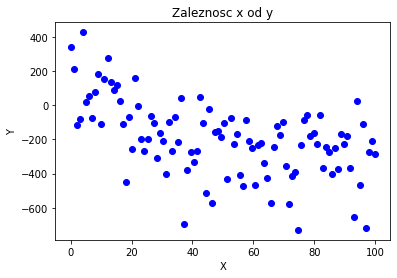

In [38]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Ridge, Lasso,RidgeCV, LassoCV



x = np.linspace(0, 100, 100)
a = ( np.random.rand() - 0.5 ) * 20          # losowa wartość a z zakresu [-10, 10]
b = ( np.random.rand() - 0.5) * 2* math.pi   # losowa wartość b z zakresu [-pi, pi]

y = a*x+b + np.random.normal(50, 200, 100)    # wartości y=ax+b z dodatkowym szumem o 
                                              # rozkładzie normalnym o średniej 50 i odchyleniu standowym 200

# print(x)
# print(y)

plt.plot(x, y, 'bo')
plt.title("Zaleznosc x od y")
plt.xlabel("X")
plt.ylabel("Y")


In [39]:
#Sprawdzmy jak dzialaja inne metody niz ML

### numpy - polyfit, czyli dopasowanie wielomianu n-tego stopnia

[-4.01795101  6.43851819]


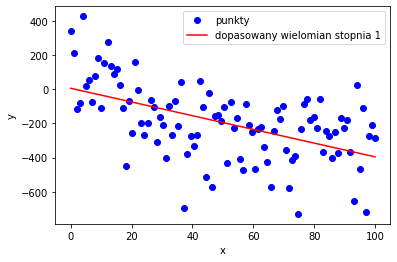

In [40]:
fit = np.polyfit(x, y, 1)  # dopasowujemy wielomian 1-go stopnia
print(fit)

fitted_a = fit[0]
fitted_b = fit[1]

fitted_y = fitted_a * x + fitted_b

plt.plot(x, y, "bo", x, fitted_y, "r-")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["punkty", "dopasowany wielomian stopnia 1"])

Średnia z residuuów: 0


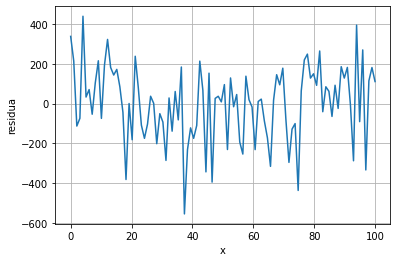

In [41]:
#sprawdzy róźnicę między przewidywanianiami a danymu

residuals = y - fitted_y
print("Średnia z residuuów: %d" % (np.mean(residuals)))

plt.plot(x, residuals)
plt.xlabel('x')
plt.ylabel("residua")
plt.grid(True)

### numpy.polyfit - niepewność dopasowania

Mamy możliwość zwrócenia macierzy kowariancji parametrów z wykonanego dopasowania.

Odchylenia standardowe parametrów $a$ i $b$ dopasowania to pierwiastek ze zdiagonalizowanej macierzy kowariancji:

$$ S = \sqrt{diag(cov)} $$

In [42]:
fit, cov = np.polyfit(x, y, 1, cov=True)  # dopasowujemy wielomian 1-go stopnia i żądamy zwrócenia macierzy kowariancji
print(fit)

fitted_a = fit[0]
fitted_b = fit[1]

uncertainty = np.sqrt(np.diag(cov))

print( "Wartość parametru a = %d" % fitted_a )
print( "Niepewność parametru a = %d" % uncertainty[0] )
print( "Wartość parametru b = %d" % fitted_b )
print( "Niepewność parametru b  = %d" % uncertainty[1] )

[-4.01795101  6.43851819]
Wartość parametru a = -4
Niepewność parametru a = 0
Wartość parametru b = 6
Niepewność parametru b  = 37


### scipy - dopasowanie krzywej wraz z niepewnościami

Wartość parametru a = -4
Niepewność parametru a = 0
Wartość parametru b = 6
Niepewność parametru b  = 37


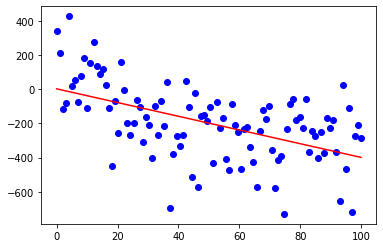

In [43]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a, b):
    return a*x + b

fit_sp, cov_sp = curve_fit(f, x, y)

a_fit = fit_sp[0]
b_fit = fit_sp[1]

uncertainty_sp = np.sqrt(np.diag(cov_sp))

print( "Wartość parametru a = %d" % a_fit )
print( "Niepewność parametru a = %d" % uncertainty_sp[0] )
print( "Wartość parametru b = %d" % b_fit )
print( "Niepewność parametru b  = %d" % uncertainty_sp[1] )

plt.plot(x, y, 'bo', x, a_fit*x+b, 'r-')


In [44]:
#Teraz przejdzmy do głównego dania dnia = Regresja używając modeli machine learning

## Regresja w Machine Learning

### Multiple Linear Regression (MLR)

MLP jest standardowo stosowaną metodą do dopasowania modelu do danych treningowych. Zakłada ona, że posiadamy treningowy zbiór wartości (np. wyodrębniony z całego zbioru danych) i na jego podstawie uczymy model odpowiednich parametrów, a następnie aplikujemy model z wyuczonymi parametrami na zbiorze testowym. Funkcja regresji ma postać $f(X, w) = X^Tw + w_0$. Algorytm zakłada minimalizację funkcję strat na zbiorze treningowym $\{X_i, y_i\}^N_{i=1}$:

$$ L(y, f(X, w)) = \sum_{i=1}^N || y_i - X_iw - w_0 ||^2, $$

gdzie $w$ jest nachyleniem prostej a $w_0$ przecięciem wykresu z osią Y. Są to więc parametry, które mają zostać dopasowane.

MLP zakłada następujące kroki działania:

1. Podział zbioru danych na zbiór treningowy i zbiór testowy}
2. Dopasowanie MLP do zbioru treningowego
3. Wykorzystanie parametrów do opisania zbioru testowego
4. Ocena jakości dopasowania
5. Wizualizacja wyników

Jakość dopasowania jest w tym przypadku określana poprzez następujące parametry:

1. Błąd średniokwadratowy RMSE (ang. Root Mean Squared Error):

$$ RMSE = \sqrt{ \frac{\sum_{i=1}^N (\hat{y}_i - y_i)^2}{N}},$$

gdzie: $N$ - liczba próbek w zbiorze testowym, $\hat{y}_i$ - wartość dopasowanej modelowej funkcji dla $i-tego$ parametru, $y_i$ - wartość dla $i-tego$ parametru w zbiorze testowym.

2. Współczynnik determinacji $R^2$ (R-squared):

$$ R^2 = \frac{\sum_{i=1}^{N} (\hat{y}_i - \bar{y} )^2}{ \sum_{i=1}^{N} (y_i - \bar{y} )^2}, $$

gdzie : $\bar{y}_i$ to wartość średnia wartości w zbiorze testowym.

W związku z tym - dążymy do mimimalizacji błędu średniokwadratowego i maksymalizacji współczynnika determinacji. RMSE powinien być jak nabardziej bliski zeru, a R-squared jak najbardziej bliski jedności.

#### Krok 1 - podział zbioru na dwie części

In [45]:
import random 
import math


def test_train(x, ratio_test = 0.75):
  train_len = math.floor(ratio_test * len(x))
  test_len = len(x) - train_len
  X_train = random.sample(np.array(x).tolist(), train_len) #  tutaj powtórzeń nie będzie
  X_train.sort()
  indexes = [x.tolist().index(s) for s in x if s in X_train ]
  Y_train = y[indexes]
  X_test = [s for s in x if s not in X_train]
  indexes = [x.tolist().index(s) for s in x if s not in X_train ]
  Y_test = y[indexes]
  # na koniec powróćmy do numpy.array, bo przecież konwertowaliśmy wszystko na zwykłe listy (krok niekonieczny)
  X_train = np.array(X_train) 
  y_train = np.array(Y_train)
  X_test = np.array(X_test)
  Y_test = np.array(Y_test)
  return X_train, y_train, X_test, Y_test

In [46]:
X_train, y_train, X_test, Y_test = test_train(x, ratio_test = 0.75)

#### Krok 2 - Dopasowanie modelu liniowego do danych treningowych

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regression = linear_model.LinearRegression() #stworzenie modelu liniowego
regression.fit(X_train.reshape(-1, 1), y_train) # X.reshape(-1, 1), ponieważ mamy jedną cechę w zbiorze (docsy linerar_model.LinearRegression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Krok 3 - zastosowanie nauczonego modelu do danych testowych

In [48]:
y_oszacowanie = regression.predict(X_test.reshape(-1, 1))

#### Krok 4 - Ocena jakości dopasowania danych testowych do modelu wyznaczonego na podstawie zbioru treningowego

Błąd średniokwadratowy (RMSE) = 185.0925
R-squared = 0.3858


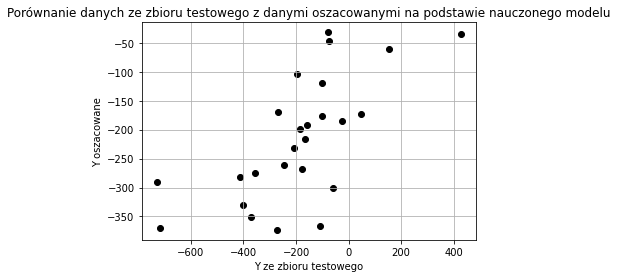

In [49]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_oszacowanie, color='black')
plt.title('Porównanie danych ze zbioru testowego z danymi oszacowanymi na podstawie nauczonego modelu')
plt.xlabel('Y ze zbioru testowego')
plt.ylabel('Y oszacowane')
plt.grid(True)

# Ewaluacja modelu
print("Błąd średniokwadratowy (RMSE) = %.4f" % np.sqrt(mean_squared_error(Y_test, y_oszacowanie)))
print('R-squared = %.4f' % r2_score(Y_test, y_oszacowanie))

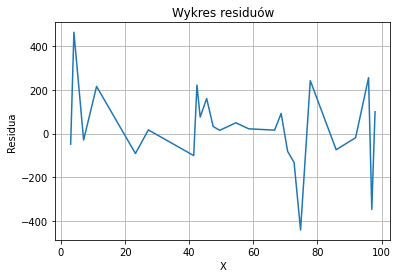

In [50]:
plt.plot(X_test, Y_test - y_oszacowanie)
plt.title("Wykres residuów")
plt.xlabel("X")
plt.ylabel("Residua")
plt.grid(True)

In [51]:
#Zad 1
#Sprawdz, czy jak sie zmienia wartosc Błędu średniokwadratowego(RMSE) i R-squared, jeśli zmienimy wartosc
#ratio_test na [0.5, 0.3, 0.1], wskaż na dla której wartości ratio, wyniki są najlepsze.
#użyj na pętli for


#### Krok 5 - postprocessing

Nachylenie =  -3.5959967108936075
Przecięcie z osią Y =  -20.894600256116775


Text(0, 0.5, 'y')

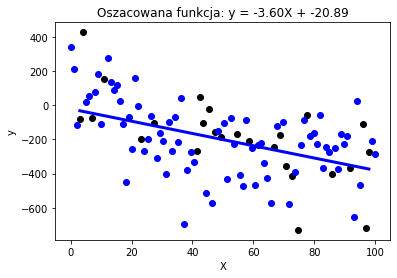

In [52]:
print('Nachylenie = ', regression.coef_[0])
print('Przecięcie z osią Y = ', regression.intercept_)

plt.scatter(X_test, Y_test,  color='black')
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_test, y_oszacowanie, color='blue', linewidth=3)
titlestr = 'Oszacowana funkcja: y = %.2fX + %.2f' % (regression.coef_[0], regression.intercept_)
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

In [53]:
# Regresja na realnych danych

In [54]:
from sklearn.datasets import load_diabetes #uzywamy gotowy dataset siedzacy w sklearn
dane = load_diabetes()

In [55]:
#opis datasetu
print(dane.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [56]:
#Korzystamy z opisu, by dowiedzieć które dane są X a które są y, a następnie przerzucamy do pandas
X = pd.DataFrame(dane.data, columns=dane.feature_names)
y = dane.target

In [57]:
#dla korelacji na rysunku
temp = X
temp['target']=y
cor = temp.corr()
target_name = 'target'
cor_target = abs(cor[target_name])



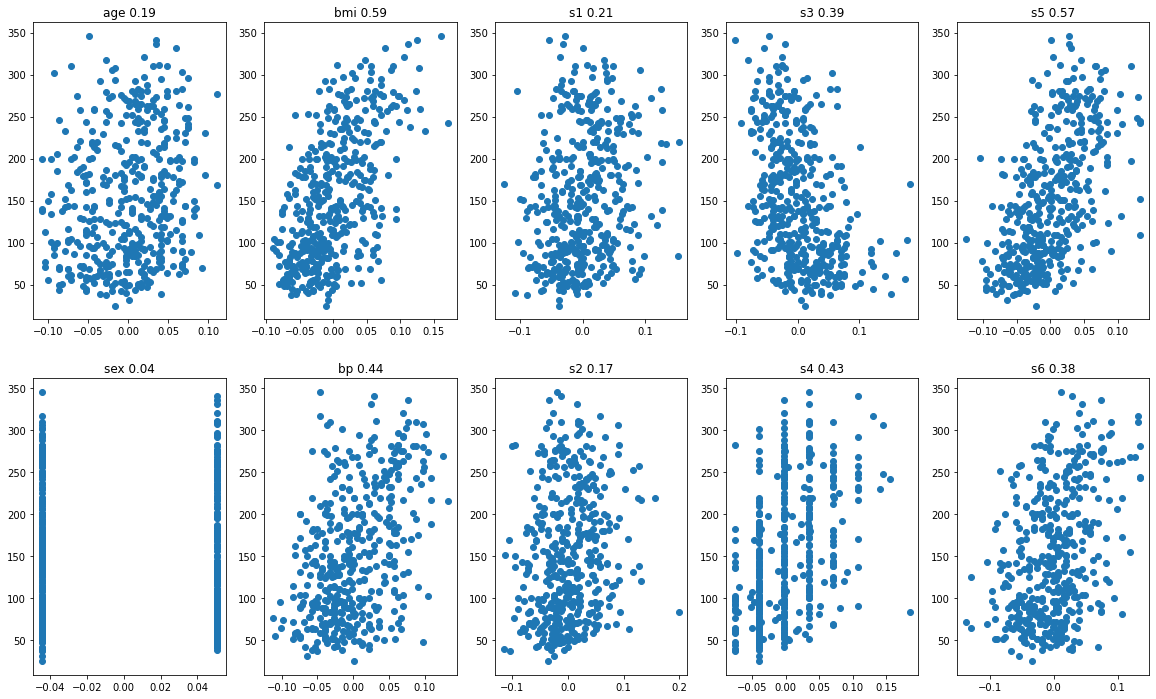

In [58]:
#pokazujemy wykresy zaleźności cech od targetu

fig, axs = plt.subplots(2, 5, figsize=(20, 12))
for i in range(10):
  axs[i % 2, i // 2].scatter(dane.data[:, i], dane.target)
  cor_val = cor_target[dane.feature_names[i]]
  cor_str = str(round(cor_val,2))
  axs[i % 2, i // 2].set_title(dane.feature_names[i]+" "+cor_str)

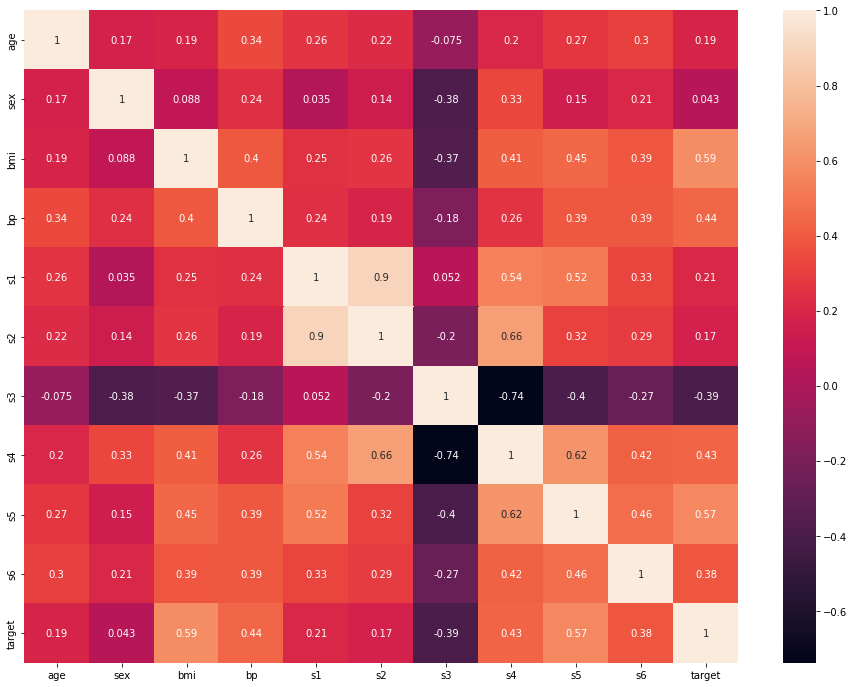

In [59]:
temp = X
temp['target']=y
plt.figure(figsize=(16,12))
sns.heatmap(temp.corr(), annot = True)

In [60]:
#jesli dla nas ten wykres jest nieczytelny, mozemy sobie ulatwic sprawe wybierajac tylko kolumny skorelowane z targetem
cor = temp.corr()
target_name = 'target'
cor_target = abs(cor[target_name])




In [61]:
high_corr = cor_target[(cor_target>0.2) & (cor_target!=1) ]
high_corr

bmi    0.586450
bp     0.441484
s1     0.212022
s3     0.394789
s4     0.430453
s5     0.565883
s6     0.382483
Name: target, dtype: float64

### Regularyzacja
wprowadzenie dodatkowej informacji do rozwiązywanego zagadnienia źle postawionego w celu polepszenia jakości rozwiązania. Bywają sytuację, gdzie poprawiają jakość generalizacji modelu.

In [62]:
#typy regularyzacji

### Regularyzjacja Tichonowa (ridge regression)

Regularyzacja Tichonowa jest w ogólności metodą regularyzacji zagadnień źle uwarunkowanych. W swoim pierwotnym założeniu polegała ona na dodaniu do źle uwarunkowanego problemu pewnego członu, zwanego członem regularyzacyjnym. Jego zadaniem jest zniwelowanie wpływu uwarunkowania na wynik (np. ograniczenie oscylacji w okolicach wyniku itp.).

Mając układ równań w postaci $Ax=b$, gdzie $A$ to macierz współczynników, $x$ to wektor niewiadomych, a $b$ to wektor rozwiązań, regularyzacja Tichonowa zakłada, że minimalizowana będzie wartość funkcjonału w postaci:

$$ \Pi = {Ax-b}^T{Ax-b} + \alpha x^Tx, $$

gdzie $\alpha$ to parametr regularyzacyjny, zwany również współczynnikiem tłumienia, a $x^Tx$ to kwadrat długości wektora $x$.

Wyznaczenie pochodnych cząstkowych funkcjonału $\Pi$ po wektorze niewiadomych i przyrównanie ich do zera prowadzi do minimalnego rozwiązania w postaci:

$$ x = [A^TA + \alpha I]x, $$

gdzie $I$ jest macierzą jednostkową. Dobór optymalnej wartości parametru regularyzacyjnego jest osobnym zagadnieniem (np. metoda L-curve).

Problem regularyzacji Tichonowa postawić można również w formaliźmie macierzowym, wykorzystując macierz regularyzacji. Minimalizowany jest wtedy funkcjonał $\Pi$ w postaci:

$$ \Pi = {Ax-b}^T{Ax-b} + \alpha[Rx]^T[Rx], $$

gdzie: $R$ jest rzeczoną macierzą regularyzacji.

Regularyzację Tichonowa wykorzystuje się w jednym z wariantów MLR, zwanym  regresją grzbietową (ang. ridge regression), minimalizując funkcję kosztu w postaci:

$$ L_r(y, f(X, w)) = \sum_{i=1}^N || y_i - X_iw - w_0||^2 + \alpha[||w||^2 + w_0^2], $$

gdzie $\alpha$ jest parametrem regularyzacynym. 

Zobaczmy jak działa zmodyfikowana postać metody MLP na tych samych danych, na których testowaliśmy wpływ korelacji na wynik dopasowania. 

### Regresja lasso (ang. least absolute shrinkage and selection operator )

Metoda lasso (również Lasso, LASSO) wykorzystywana jest jako metoda regresji, która wykorzystuje zarówno selekcję cech jak i regularyzację w celach minimalizacji błędu przewidywania modelu statystycznego, który otrzymywany jest jako wynik działania metody.

W przypadku regresji, metoda lasso daje bardziej zwięzłe wyniki od regularyzacji Tichonowa i MLR - redukowany jest przez to wpływ przeszacowania modelu na ostateczny wynik dopasowania. Regresja lasso sprowadza się dominimalizacji funkcji kosztu w postaci:

$$ L_{lasso}(y, f(X, w)) = \sum_{i=1}^{N} || y_i - X_iw - w_0 ||^2 + \alpha [||w|| + |w_0|].$$ 

Poniżej przedstawiono prówanie wyników regresji lasso z poprzednio stosowanymi metodami:

In [63]:
def show_results(model, X_train, X_test, y_train, y_test):
  print('rmse test ', np.sqrt(mse(model.predict(X_test), y_test)))
  print('rmse train ',np.sqrt(mse(model.predict(X_train), y_train)))
  print('mae test ',mae(model.predict(X_test), y_test))
  print('mae train ',mae(model.predict(X_train), y_train))

In [64]:
#Sprawdzmy czy na naszych danych, czy jakakolwiek z regularyzacji poprawi jakość

X_train, X_test, y_train, y_test = train_test_split(dane.data, dane.target, test_size=0.2)
lm = LinearRegression().fit(X_train, y_train)
print("Wyniki dla regresji liniowej bez regularyzacji")
show_results(lm, X_train, X_test, y_train, y_test)

Wyniki dla regresji liniowej bez regularyzacji
rmse test  57.18418788371645
rmse train  52.787050537220814
mae test  45.95768265317797
mae train  42.71997601706883


In [65]:
lm_ridge = Ridge(alpha=1.0)
lm_ridge.fit(X_train, y_train)
print("Wyniki dla regresji liniowej z regularyzacja grzbietowa")
show_results(lm_ridge, X_train, X_test, y_train, y_test)

Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  61.10937875103709
rmse train  57.06117919730379
mae test  50.83442377531097
mae train  47.85284657677415


In [66]:
lm_lasso = Lasso(alpha=1.0)
lm_lasso.fit(X_train, y_train)
print("Wyniki dla regresji liniowej z regularyzacja typu Lasso")
show_results(lm_lasso, X_train, X_test, y_train, y_test)

Wyniki dla regresji liniowej z regularyzacja typu Lasso
rmse test  64.00217775527447
rmse train  61.18840411427221
mae test  54.124829614792525
mae train  52.148023716766716


In [67]:
#Żeby sprawdzić jeszcze ulepszone typy modelów, musimy wprowadzić pojęcie walidacji krzyżowej

### Walidacja krzyżowa

In [68]:
# Walidacja krzyżowa jest techniką oceny modelu uczenia maszynowego i testowania jego wydajności.
# Głownie ma na cely wyelimowac zjawisko przeuczenia
# Istnieje wiele różnych technik, które mogą być użyte do walidacji krzyżowej modelu. Jednak wszystkie działają podobnie
# Podzielenie zbioru danych na typy: treningowy i testowy
# w zależności liczby kawałkow(fold), masz rózny podzial zbioru, tutaj cv=5
# ogolnie rzecz biorac, kazdy z foldow będzie kiedys foldem testowym, a pozostale treningowym
# zapobiegamy sytuacji, ze model nauczy sie idealnie relacji na konkretnym kawalku zbioru, jak przy zwyklym train_test_split
# a nie bedzie mial zdolnosci generalizacji na danych testowych

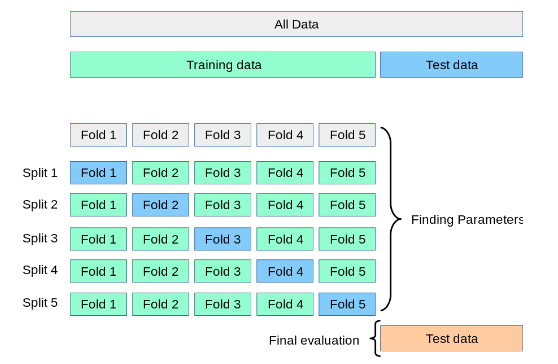

In [69]:
lm_ridge_CV = RidgeCV().fit(X_train, y_train)
lm_lasso_CV = LassoCV().fit(X_train, y_train)

print("Wyniki dla regresji liniowej z regularyzacja grzbietowa")
show_results(lm_ridge_CV, X_train, X_test, y_train, y_test)

print("Wyniki dla regresji liniowej z regularyzacja typu Lasso i walidacja krzyzowa")
show_results(lm_lasso_CV, X_train, X_test, y_train, y_test)

Wyniki dla regresji liniowej z regularyzacja grzbietowa
rmse test  57.68573770380557
rmse train  52.96434458265046
mae test  46.363954203017485
mae train  43.121669299547214
Wyniki dla regresji liniowej z regularyzacja typu Lasso i walidacja krzyzowa
rmse test  57.63969933940896
rmse train  53.050412152891305
mae test  46.32590674969234
mae train  43.27997165600993


In [70]:
#zad2 
#sprawdz, czy ustawienie parametru cv=5 i cv=10, poprawia jakość generalizacji(RidgeCV, LassoCV)
#nie zapomnij o tym, ze możesz uczyć model na całym zbiorze, a nie na tylko zbiorze treningowym


In [71]:
#zad3 wroc do zmiennej high_corr, sprawdz czy wziecie tylko cech wysoko skorelowanych z zmienna target, poprawia jakosc modelu
#podpowiedz, trzeba mniej wiecej brac wysoko skorelowane dane X[high_corr], pandas moźe być Twoim przyjacielem
#uwaga, przy zmianie liczby kolumn, moga wymiary sie nie zgadzac